# Time Series Analysis with FRED Data

This notebook demonstrates advanced time series analysis techniques using FRED data, including:
- Seasonal decomposition
- Trend analysis
- Moving averages
- Growth rate calculations

In [1]:
import sys
sys.path.append('../..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats

from src.api.fred_client import FREDClient
from src.models.economic_data import Series
from src.utils.helpers import series_to_dataframe

%matplotlib inline
plt.style.use('classic')

## Fetch and Prepare Data

Let's analyze retail sales data, which typically shows strong seasonal patterns.

In [2]:
client = FREDClient()

# Fetch retail sales data
retail_data = client.get_series('RSXFS')
retail_series = Series.from_api_response(retail_data)
retail_df = series_to_dataframe(retail_series)

# Ensure the index is datetime
retail_df.index = pd.to_datetime(retail_df.index)

print("Data range:", retail_df.index.min(), "to", retail_df.index.max())
retail_df.head()

Data range: 1992-01-01 00:00:00 to 2025-01-01 00:00:00


,value
date,
1992-01-01,146925.0
1992-02-01,147223.0
1992-03-01,146805.0
1992-04-01,148032.0
1992-05-01,149010.0


## Seasonal Decomposition

Let's decompose the time series into trend, seasonal, and residual components.

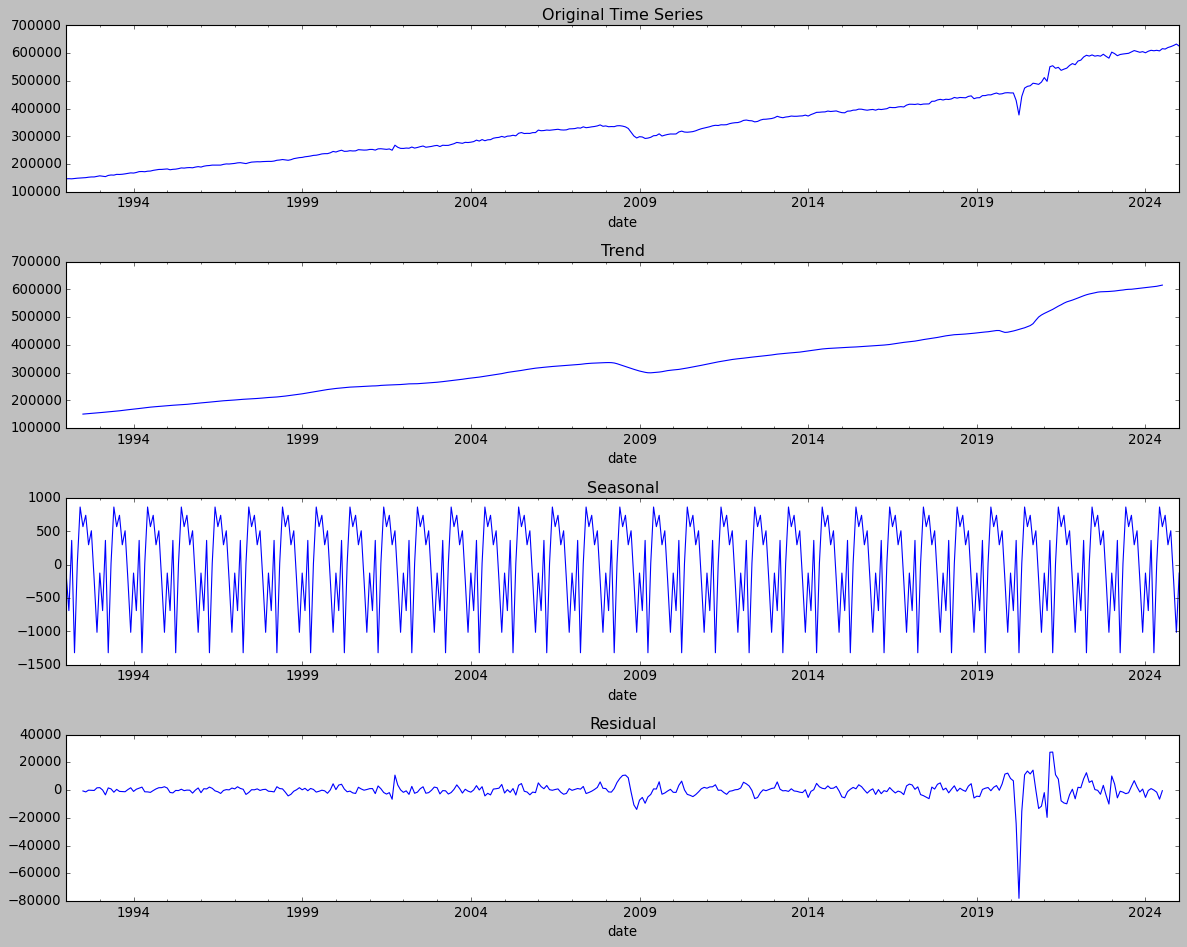

In [3]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(retail_df['value'], period=12)

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))

decomposition.observed.plot(ax=ax1)
ax1.set_title('Original Time Series')

decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend')

decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')

decomposition.resid.plot(ax=ax4)
ax4.set_title('Residual')

plt.tight_layout()
plt.show()

## Calculate Growth Rates

Let's analyze month-over-month and year-over-year growth rates.

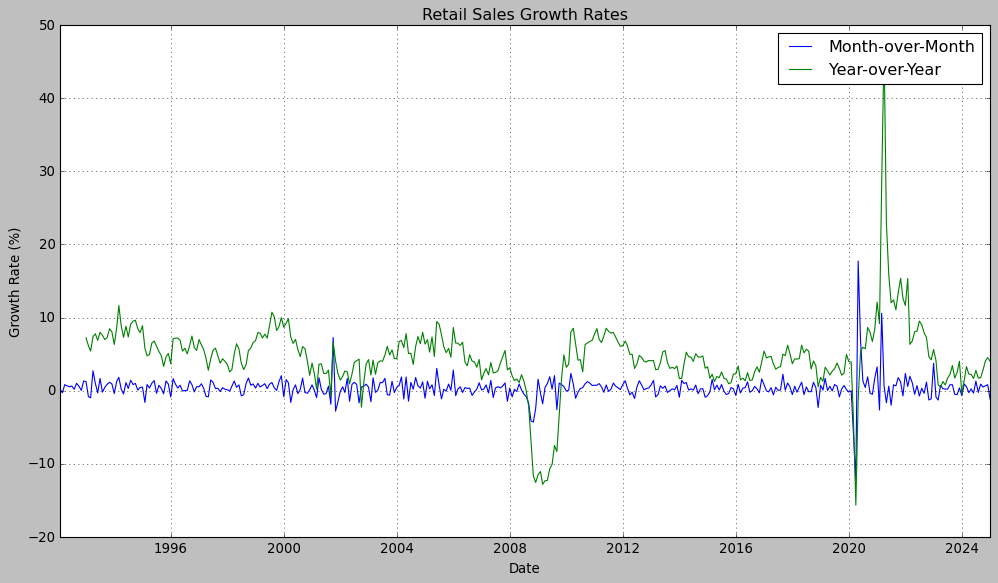

In [4]:
# Calculate month-over-month growth rates
retail_df['mom_growth'] = retail_df['value'].pct_change() * 100

# Calculate year-over-year growth rates
retail_df['yoy_growth'] = retail_df['value'].pct_change(periods=12) * 100

# Plot growth rates
plt.figure(figsize=(15, 8))
plt.plot(retail_df.index, retail_df['mom_growth'], label='Month-over-Month')
plt.plot(retail_df.index, retail_df['yoy_growth'], label='Year-over-Year')
plt.title('Retail Sales Growth Rates')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.show()